<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(URL)

## Generate Descriptive Statistics and Visualizations
### "Median value of owner-occupied homes"

Text(0.5, 1.0, 'Median value of owner-occupied homes')

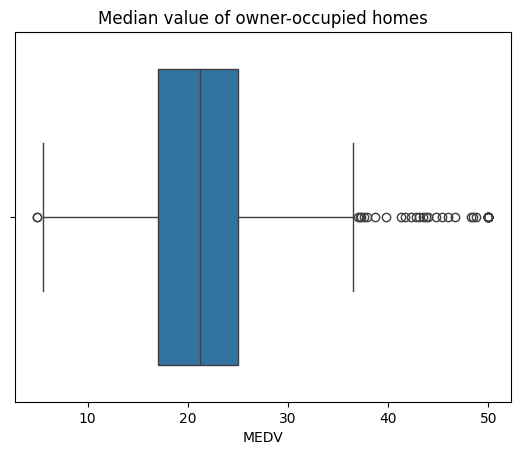

In [6]:
ax = sns.boxplot(x=boston_df['MEDV'])
ax.set_title("Median value of owner-occupied homes")

Note: The media values for occupied homes is approx 20k and a large number of outliers exist beyond the upper bounds suggesting the data is skewed to the right.

### Charles River
##### 1: Tract bounds river 0: Otherwise

Text(0.5, 1.0, 'Frequency of Properties near to Charles River')

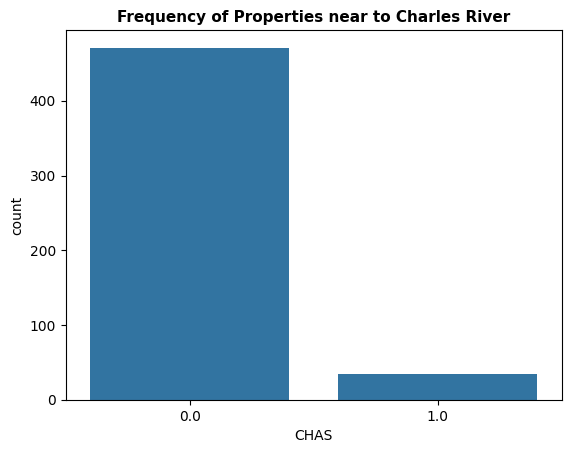

In [9]:
ax = sns.countplot(data = boston_df, x = 'CHAS')
ax.set_title('Frequency of Properties near to Charles River', fontsize=11, weight='bold')

Note: Note: The bar plot indicates that a larger proportion of the dataset consists of properties not near the Charles River (CHAS = 0.0), while a smaller proportion is near the river (CHAS = 1.0).

### MEDV variable vs the AGE variable


(The age variable is discretized into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, 'MEDV variable vs the AGE variable')

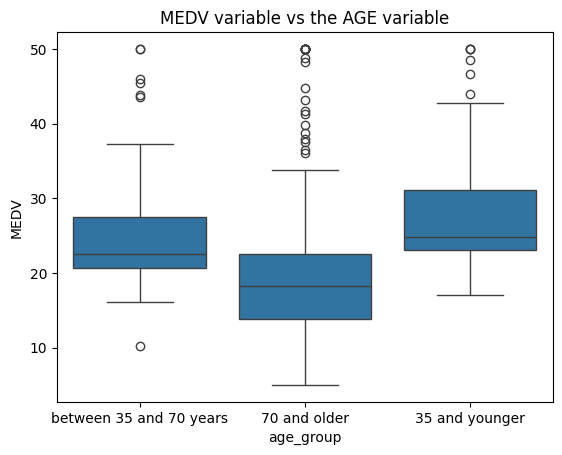

In [11]:
#dividing the data
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = "between 35 and 70 years"
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = "70 and older"

ax = sns.boxplot( x = "age_group", y="MEDV", data = boston_df)
ax.set_title("MEDV variable vs the AGE variable")

# Nowcreate the boxplot

Note: the boxplot suggests there is a variation in median home values across different age groups, with properties 35 years or less generally having higher median values compared to older properties.

### Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

Text(0, 0.5, 'nitric oxides concentration (parts per 10 million)')

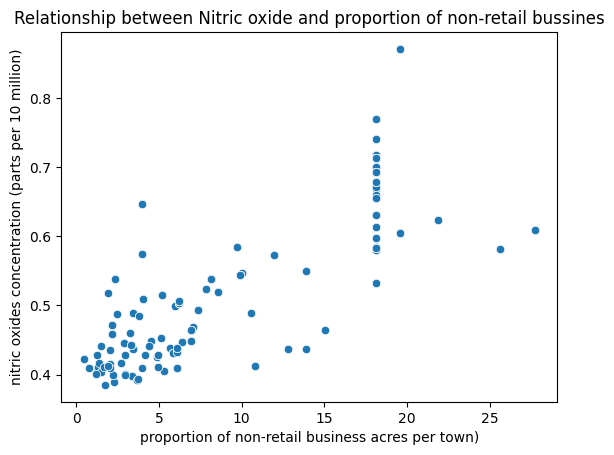

In [ ]:
ax = sns.scatterplot(x= 'INDUS', y='NOX', data = boston_df)
ax.set_title("Relationship between Nitric oxide and proportion of non-retail bussines")
ax.set_xlabel( 'proportion of non-retail business acres per town)')
ax.set_ylabel( 'nitric oxides concentration (parts per 10 million)')

Note: the scatter plot indicates that below NOX = 0.6 there seems to be a linear relationship between nitric oxide concentrations and the proportion of non-retail business acres per town. After which increases in the level of NOX do not appear to continue to increase INDUS.

### Pupil-teacher ratio by town

PTRATIO - pupil-teacher ratio by town)

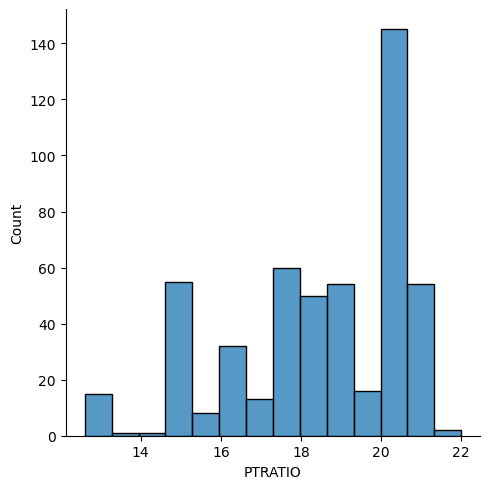

In [ ]:
ax = sns.displot(boston_df['PTRATIO'], kde = False)

Note: the pupil to teacher ratio is highest at 20-21 range, with a 140 towns. Other ratios have varying frequencies, with some occurring only once or a few times in the dataset.

## Task 3: Use the appropriate tests to answer the questions provided.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

H0: There is no significant difference in median values of houses bounded by the Charles river and those not bounded by it

H1: There is a significant difference in median values of houses bounded by the Charles river and those not bounded by it

Test Statistic: T-test for independent samples

Significance Level (α): 0.05

In [ ]:
import scipy.stats

In [ ]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

#### Analysis
As p-value is less than 0.05 , we reject null hypothesis as there is a significant difference in median values of houses bounded by the Charles river and those not bounded by it

In [ ]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

Conclusion: Since the p-value is less than 0.05 we reject the null hypothesis as there is enough proof that there is a statistical difference in Median value of owner-occupied homes based on Charles river variable

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

H0: There is no significant difference in median values of houses (MEDV) across different proportions of owner-occupied units built prior to 1940 (AGE)

H1: There is a significant difference in median values of houses (MEDV) across different proportions of owner-occupied units built prior to 1940 (AGE)

Test Statistic: Analysis of Variance (ANOVA)

Significance Level (α): 0.05

In [ ]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [ ]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 and older']['MEDV']

In [ ]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### Analysis:
As p-value is less than 0.05 , we reject null hypothesis as there is a significant difference in median values of houses across different proportions of owner-occupied units built prior to 1940.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
H0: There is no significant correlation between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS)

H1: There is a significant correlation between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS)

Test Statistic: Pearson Correlation
Significance Level (α): 0.05

In [ ]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Analysis: As the p-value is less than 0.05, we reject the null hypothesis as there is a significant correlation between Nitric oxide concentrations and proportion of non-retail business acres per town. This is supported by a high correlation coefficient of 0.76.

### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

H0: The weighted distance to the five Boston employment centers does not have a significant impact on the median value of owner-occupied homes

H1: The weighted distance to the five Boston employment centers has a significant impact on the median value of owner-occupied homes

Test Statistic: Multiple Linear Regression
Significance Level (α): 0.05

In [ ]:

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        20:05:39   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

if we added an additional weight distance the values of the owner occupied homes may raise $188